## REG.NO : 212224060031
## NAME   : V.Atchaya


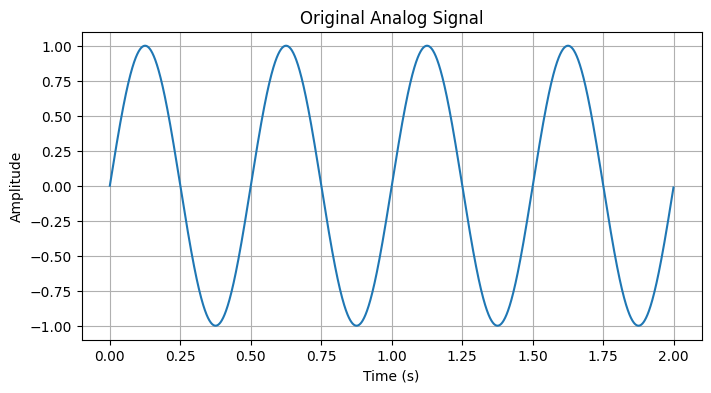

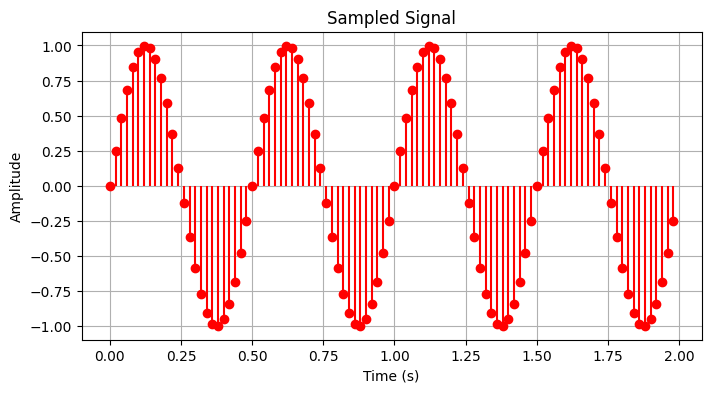

Delta Modulated Bit Stream:
[1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1]


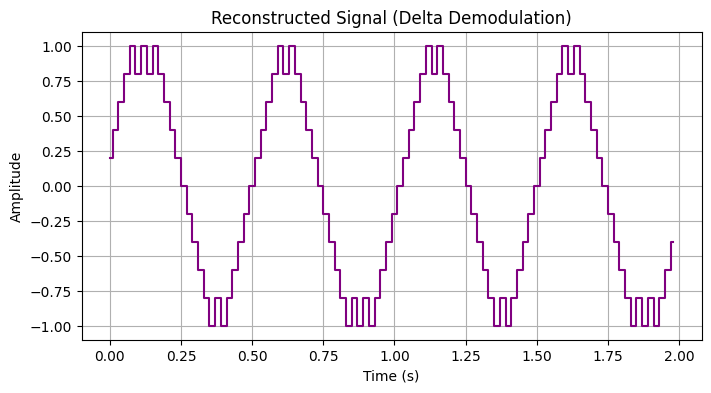

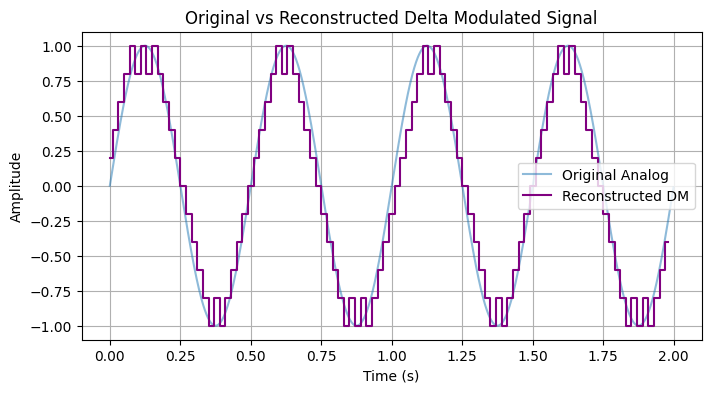

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ===== Signal Parameters =====
frequency = 2        # Hz
amplitude = 1
duration = 2         # seconds
analog_rate = 1000   # Hz for smooth analog plot
sample_rate = 50     # Hz sampling (higher than PCM for better DM)
delta = 0.2          # Step size (important parameter in DM)

# ===== Analog Signal =====
t = np.linspace(0, duration, int(analog_rate * duration), endpoint=False)
analog_signal = amplitude * np.sin(2 * np.pi * frequency * t)

plt.figure(figsize=(8,4))
plt.plot(t, analog_signal)
plt.title("Original Analog Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# ===== Sampling =====
t_samp = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
sampled_signal = amplitude * np.sin(2 * np.pi * frequency * t_samp)

plt.figure(figsize=(8,4))
plt.stem(t_samp, sampled_signal, linefmt='r-', markerfmt='ro', basefmt=' ')
plt.title("Sampled Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# ===== Delta Modulation Encoding =====
dm_output = []
reconstructed = []

prev_value = 0   # Initial predicted value

for sample in sampled_signal:
    if sample >= prev_value:
        dm_output.append(1)
        prev_value += delta
    else:
        dm_output.append(0)
        prev_value -= delta
    reconstructed.append(prev_value)

dm_output = np.array(dm_output)
reconstructed = np.array(reconstructed)

print("Delta Modulated Bit Stream:")
print(dm_output)

# ===== Plot Reconstructed Signal =====
plt.figure(figsize=(8,4))
plt.step(t_samp, reconstructed, where='mid', color='purple')
plt.title("Reconstructed Signal (Delta Demodulation)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# ===== Comparison Plot =====
plt.figure(figsize=(8,4))
plt.plot(t, analog_signal, label='Original Analog', alpha=0.5)
plt.step(t_samp, reconstructed, where='mid', color='purple', label='Reconstructed DM')
plt.title("Original vs Reconstructed Delta Modulated Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()